#### Import Libraries (Data Loading & Inspection)

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 

warnings.filterwarnings("ignore")


#### Load datset

In [2]:
df = pd.read_csv("AB TEST VIDEO IMAGE STIMULATED.csv")

## Data Cleaning and Transformation

#### Observe the columns and first few rows of the tables

In [3]:
df.head()

,Post ID,Post Date,Post Day,Post Type,Impressions,Reach,Reactions,Comments,Reposts,Engagement Rate,Clicks,CTR,Conversions,Conversion Rates,Time of Post (hours)
0,10134,5/26/2025,Mon,Video,65,57,10,0,0,0.97,21,0.323077,6,0.092,11
1,10135,5/28/2025,Wed,Video,34,32,2,0,0,0.56,7,0.205882,2,0.059,14
2,10114,5/8/2025,Thu,Video,70,66,21,4,0,0.78,12,0.171429,4,0.057,13
3,10144,6/6/2025,Fri,Video,90,78,7,5,0,0.85,33,0.366667,5,0.056,9
4,10133,5/26/2025,Mon,Video,102,86,45,8,0,0.62,35,0.343137,5,0.049,11


#### Data types of each columns

In [4]:
df.dtypes

Post ID                   int64
Post Date                object
Post Day                 object
Post Type                object
Impressions               int64
Reach                     int64
Reactions                 int64
Comments                  int64
Reposts                   int64
Engagement Rate         float64
Clicks                    int64
CTR                     float64
Conversions               int64
Conversion Rates        float64
Time of Post (hours)      int64
dtype: object

#### Check for duplicates with respect to Post ID

In [5]:
df.duplicated(subset= 'Post ID').sum()

np.int64(2)

#### Drop duplicate entries

In [6]:
df = df.drop_duplicates(subset = 'Post ID')

#### Convert Post Date column to DateTime Format

In [7]:
df['Post Date'] = pd.to_datetime(df['Post Date'])

## Basic Explorative Analysis

In [8]:
df.describe()

,Post ID,Post Date,Impressions,Reach,Reactions,Comments,Reposts,Engagement Rate,Clicks,CTR,Conversions,Conversion Rates,Time of Post (hours)
count,42.000000,42,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,10131.500000,2025-05-23 20:00:00,129.833333,116.047619,39.666667,6.690476,0.380952,0.447381,26.261905,0.186606,1.333333,0.013881,11.785714
min,10111.000000,2025-05-05 00:00:00,19.000000,14.000000,2.000000,0.000000,0.000000,0.010000,1.000000,0.038278,0.000000,0.000000,9.000000
25%,10121.250000,2025-05-14 06:00:00,65.500000,58.250000,10.000000,0.000000,0.000000,0.322500,8.000000,0.125893,0.000000,0.000000,10.000000
50%,10131.500000,2025-05-22 12:00:00,102.500000,93.000000,26.000000,3.500000,0.000000,0.450000,20.000000,0.174603,1.000000,0.004500,11.000000
75%,10141.750000,2025-06-02 18:00:00,197.500000,160.500000,63.750000,10.250000,0.000000,0.547500,32.750000,0.260522,2.000000,0.019500,13.000000
max,10152.000000,2025-06-13 00:00:00,340.000000,325.000000,108.000000,32.000000,3.000000,0.970000,102.000000,0.366667,6.000000,0.092000,17.000000
std,12.267844,NaN,86.093799,81.590277,34.732193,8.769370,0.794873,0.190648,24.672548,0.089319,1.830189,0.020793,2.203497


In [9]:
median_conversions = df['Conversion Rates'].median()
median_conversions


0.0045000000000000005

#### Comparing Conversion rates of  VIDEO and IMAGE performance

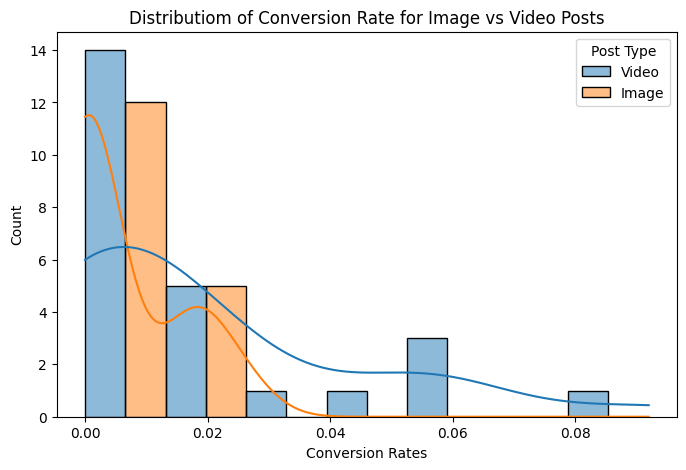

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x ='Conversion Rates', hue = 'Post Type', multiple = 'dodge', bins =7, edgecolor = 'k', kde= True)
plt.title('Distributiom of Conversion Rate for Image vs Video Posts')
plt.xlabel('Conversion Rates')
plt.ylabel('Count')
plt.show()

In [11]:
df.columns

Index(['Post ID', 'Post Date', 'Post Day', 'Post Type', 'Impressions', 'Reach',
       'Reactions', 'Comments', 'Reposts', 'Engagement Rate', 'Clicks', 'CTR',
       'Conversions', 'Conversion Rates', 'Time of Post (hours)'],
      dtype='object')

#### Check if the categorical variable have appropriate number of levels

In [12]:
df_cat= df[['Post Day', 'Post Type']]
df_cat.nunique()

Post Day     7
Post Type    2
dtype: int64

#### Check if the categorical variable have appropriate levels

In [13]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

POST DAY : ['Mon' 'Wed' 'Thu' 'Fri' 'Tue' 'Sun' 'Sat']
POST TYPE : ['Video' 'Image']


In [14]:
 df_cat=df[['Post Day', 'Post Type', 'Conversion Rates', 'Time of Post (hours)']]

#### Univariate Analysis

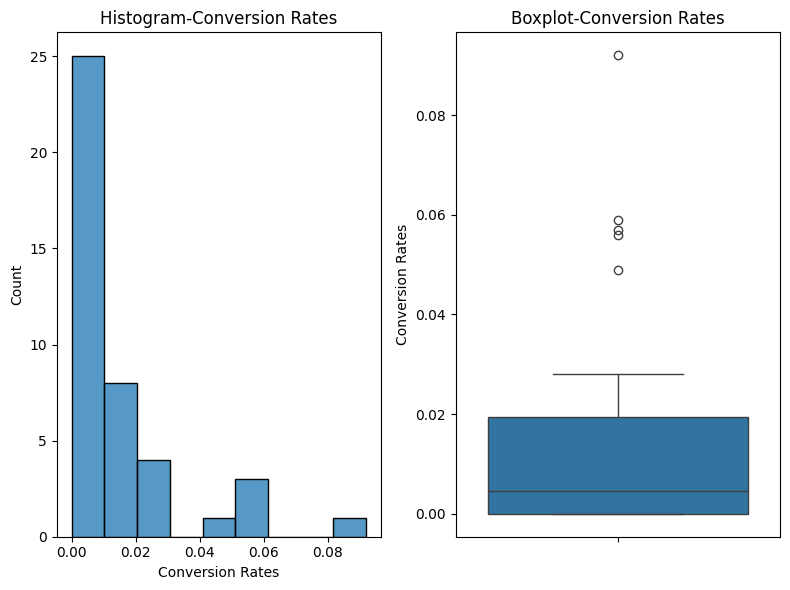

In [15]:
variable = 'Conversion Rates'

plt.figure(figsize=(8,6))
# Histogram
plt.subplot(1,2,1)
sns.histplot(x= variable, data=df)
plt.title(f'Histogram-{variable}')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(y= variable, data=df)
plt.title(f'Boxplot-{variable}')
plt.tight_layout()
plt.show()

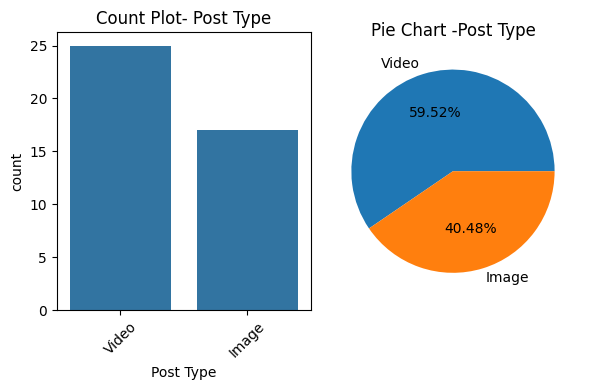

In [16]:
variable = 'Post Type'
plt.figure(figsize=(6,4))

# Count Plot 
plt.subplot (1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation=45)

# Pie Chart
plt.subplot (1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels= counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart -{variable}') 

# Adjust Layout
plt.tight_layout()


# Show the plots
plt.show()
        


           

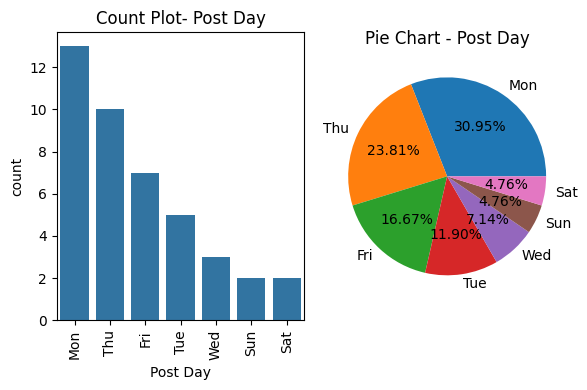

In [17]:
variable = 'Post Day'
plt.figure(figsize=(6,4))

# Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= df_cat, order= df_cat['Post Day'].value_counts().index)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation = 90)

# Pie Chart
plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


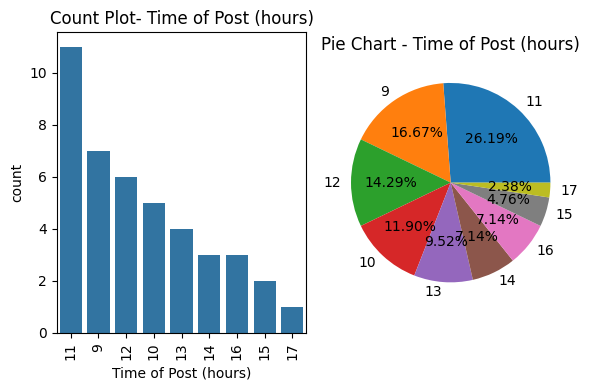

In [18]:
variable = 'Time of Post (hours)' # Note that, 1 means 1pm, 2 means 2pm, 10 means 10am, etc.
plt.figure(figsize=(6,4))

# Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= df_cat, order= df_cat['Time of Post (hours)'].value_counts().index)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation = 90)

# Pie Chart
plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

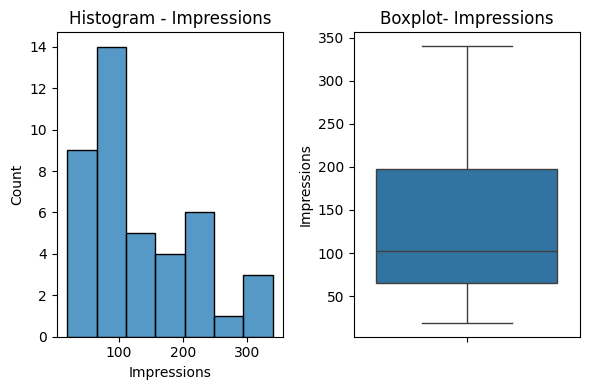

In [19]:
variable = 'Impressions'
plt.figure(figsize=(6,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data = df)
plt.title(f'Histogram - {variable}')

# Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot- {variable}')

 # Adjust layout
plt.tight_layout()
# Show plots


# REASON FRO PLOTTING THE HISTOGAM AND BOXPLOT
# They were plotted to examine the distribution and spread of exposure levels across all posts. 
# The histogram helps to identify whether the data is right-skewed distribution or left skewed.  A right skewed means most posts have low impressiosn.
# while a few post have very high exposure, suggesting an unequal visibility across content. 

# The box plot complements this by showing the median number of impressions, interquartile range, and possible outliers. 

### Bivariate Analysis

<Axes: xlabel='Post Type', ylabel='Conversion Rates'>

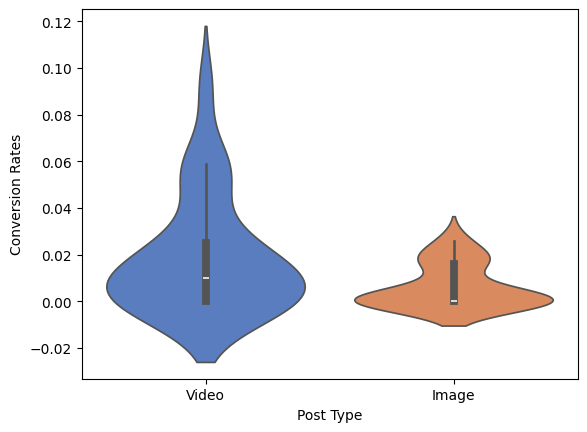

In [20]:
sns.violinplot(x='Post Type', y='Conversion Rates', data= df, palette = 'muted')

#### Comparing Post Day and Conversion Rates

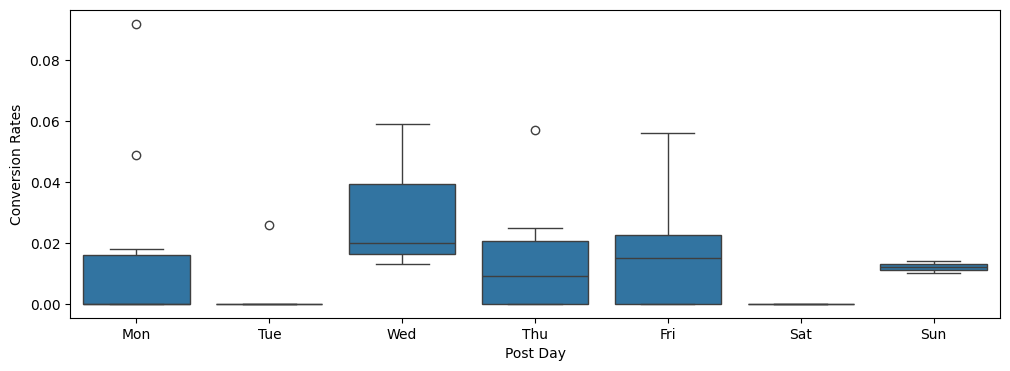

In [21]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Post Day', y='Conversion Rates', data=df, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

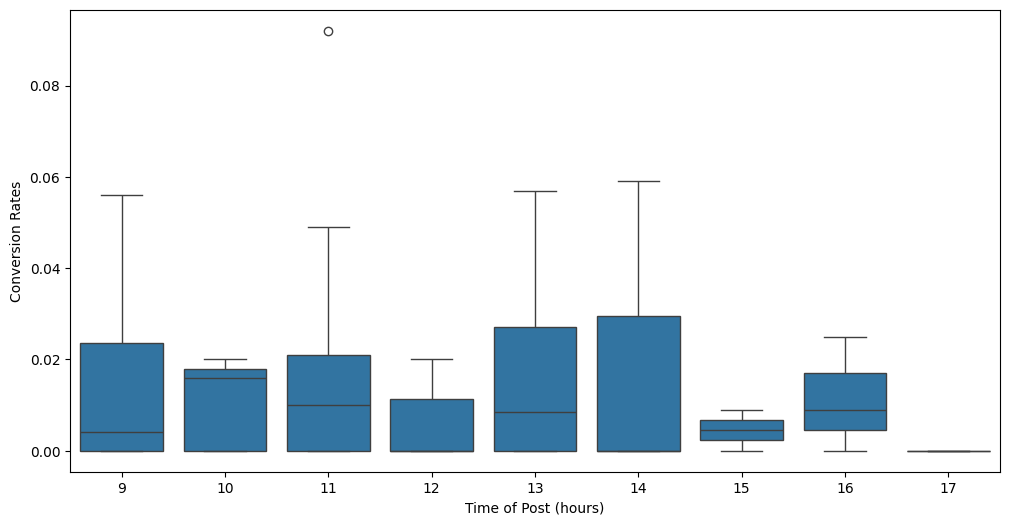

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Time of Post (hours)', y= 'Conversion Rates', data=df)
plt.show()

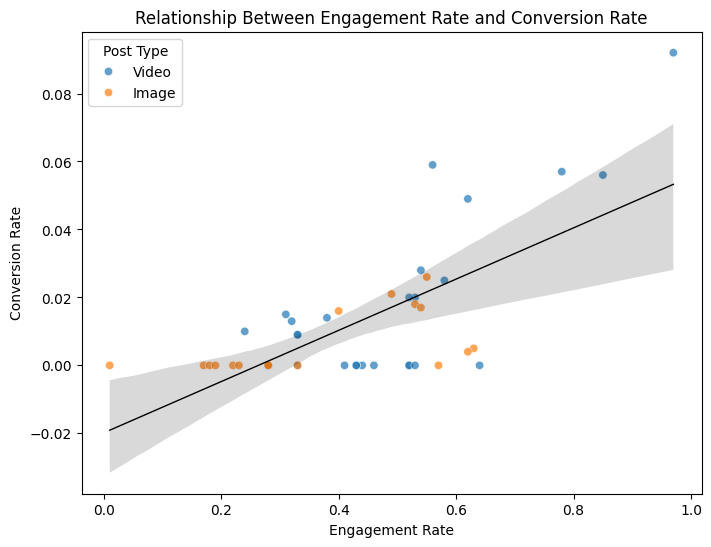

In [23]:
# SCATTER PLOT OF ENGAGEMENT RATE AND CONVERSION RATE


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Engagement Rate',y='Conversion Rates', hue = 'Post Type', alpha=0.7)
sns.regplot(data=df, x='Engagement Rate',y='Conversion Rates', scatter= False, color='black', 
            line_kws={'linewidth':1})
plt.title('Relationship Between Engagement Rate and Conversion Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Conversion Rate')
plt.show()

## Inferential / Statistical Testing

### Shapiro-Wilk normality test

In [24]:
import scipy.stats as stats
# Separate conversion rates by post type
image_conversion = df[df['Post Type'] == 'Image']['Conversion Rates'].dropna() 
video_conversion= df[df['Post Type']=='Video']['Conversion Rates'].dropna()

# Shapiro-Wilk normality test for image posts
stat_image, p_image = stats.shapiro(image_conversion)
print(f"Image posts: Shapiro-Wilk stat={stat_image:.3f}, p-value={p_image:.3f}")
if p_image>0.05:
    print("Image conversion rates are approximately normal") 
else: 
    print("Image conversion rates are not normal")

# Shapiro-Wilk normality test for Video posts
stat_video, p_video = stats.shapiro(video_conversion)
print(f"Video posts: Shapiro-Wilk stat={stat_video:.3f}, p-value={p_video:.3f}")
if p_video>0.05:
    print("Video conversion rates are approximately normal") 
else: 
    print("Video conversion rates are not normal")

    

    

Image posts: Shapiro-Wilk stat=0.711, p-value=0.000
Image conversion rates are not normal
Video posts: Shapiro-Wilk stat=0.777, p-value=0.000
Video conversion rates are not normal


### Run a Mann-Whitney U test (Normality Check)
##### Purpose: Compare conversion rates between image and video posts since the data is not normally distributed.
##### If p-value < 0.05, then reject the Null Hypothesis: meaning there is a significant difference, supporting that video postsperform better. 
##### If p-value >= 0.05, fail to reject the Null Hypothesis and no significant difference between image and video posts.

In [25]:
import scipy.stats as stats
# Separate conversion rates by post type
image_conversion = df[df['Post Type'] == 'Image']['Conversion Rates'].dropna() 
video_conversion= df[df['Post Type']=='Video']['Conversion Rates'].dropna()

# Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(image_conversion, video_conversion, alternative='two-sided')

# Print results
print(f"Mann-Whitney U Test Statistic:{stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the conversion rates between image an video posts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates between image and video posts.")

Mann-Whitney U Test Statistic:155.000
P-value: 0.122
Fail to reject the null hypothesis: No significant difference in conversion rates between image and video posts.


#### PROJECT CONCLUSION: Image vs. Video Post Conversion Rates

#### Export cleaned data to desk top

In [26]:
df.to_csv('C:/Users/RUTH/Python files/data.csv', index = False)

In [30]:
import os 
os.getcwd()

'C:\\Users\\RUTH'